### -------------------------------- 2nd part ------------------------------------

# 2) Pre-processing and Data Cleaning
1) Handling Missing Values:
2) Handling Outliers:
3) Encoding Categorical Variables: 
4) Removing Irrelevant or Redundant Features:

5) Handling Skewed Data:
6) Feature Scaling: 


# 3) Feature Engineering:

1) Derive new features

### -----------------------------------------------------------------------------------

### 2) Pre-processing and Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("/Users/zhoramkoyan/Desktop/Project 2nd approach/Downloaded data/listings.csv")
df.head()

/var/folders/gt/hxr26ny102bdtmmfdslxf5080000gn/T/ipykernel_33830/2692671911.py:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/zhoramkoyan/Desktop/Project 2nd approach/Downloaded data/listings.csv")


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,801749842377802394,https://www.airbnb.com/rooms/801749842377802394,20230306014634,2023-03-06,city scrape,A home away from home,The whole group will be comfortable in this sp...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495455523,https://www.airbnb.com/users/show/495455523,Michael,2023-01-10,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/773ed...,https://a0.muscache.com/im/pictures/user/773ed...,Canarsie,1.0,1.0,"['email', 'phone']",t,f,NaN,Canarsie,Brooklyn,40.640403,-73.888535,Private room in home,Private room,2,NaN,1 bath,1.0,1.0,"[""50\"" TV"", ""Bathtub"", ""Microwave"", ""Free driv...",$143.00,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,30,60,90,364,2023-03-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,765948794133787266,https://www.airbnb.com/rooms/765948794133787266,20230306014634,2023-03-06,city scrape,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488760226,https://www.airbnb.com/users/show/488760226,Eric,2022-11-22,NaN,NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/87e00...,https://a0.muscache.com/im/pictures/user/87e00...,Canarsie,2.0,5.0,"['email', 'phone']",t,t,NaN,Canarsie,Brooklyn,40.648510,-73.894330,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Free parking on premises"", ""Carbon monoxide ...",$30.00,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,15,19,38,41,2023-03-06,13,13,5,2022-12-06,2023-02-19,4.85,4.77,4.77,4.85,4.92,4.85,4.92,NaN,t,2,1,1,0,4.29
2,636274456676328779,https://www.airbnb.com/rooms/636274456676328779,20230306014634,2023-03-06,city scrape,Villa Masino.,Close to beach Peaceful walk to park & beach...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,461263600,https://www.airbnb.com/users/show/461263600,Tommaso,2022-05-27,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Tottenville,1.0,1.0,"['email', 'phone']",f,f,NaN,Tottenville,Staten Island,40.507114,-74.251907,Entire villa,Entire home/apt,6,NaN,2 baths,2.0,2.0,"[""BBQ grill"", ""Security cameras on property"", ...",$157.00,1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,30,60,90,364,2023-03-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,768125251187660469,https://www.airbnb.com/rooms/768125251187660469,20230306014634,2023-03-06,city scrape,1-Bedroom Private Room with King Size Bed,Private room with king size bedroom near Sheep...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,475699129,https://www.airbnb.com/users/show/475699129,Suliman,2022-08-18,NaN,NaN,within an hour,99%,98%,t,http

In [3]:
# 
df['price'] = df['price'].str.replace('$', '').astype(str)
df['price'] = df['price'].str.replace(',', '').astype(str)
df['price'] = pd.to_numeric(df["price"])

/var/folders/gt/hxr26ny102bdtmmfdslxf5080000gn/T/ipykernel_33830/3279933910.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').astype(str)


In [4]:
df.corr()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.000000,NaN,0.426288,0.124397,0.147386,0.007417,0.080093,0.119904,NaN,0.132744,0.076068,0.038273,-0.164861,-0.003279,-0.152217,-0.061197,-0.016065,-0.022715,-0.068944,-0.018636,NaN,0.270726,0.294601,0.310212,0.332678,-0.230812,-0.057211,0.069391,0.052938,-0.023498,0.042783,-0.036014,-0.012376,-0.049657,-0.017392,0.150212,0.105823,0.115842,0.044373,0.224309
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.426288,NaN,1.000000,0.036905,0.033555,0.025596,0.141780,0.116786,NaN,0.078900,0.090245,0.021551,-0.175200,-0.004034,-0.155940,-0.114871,0.012790,0.020619,-0.124235,0.015548,NaN,0.286572,0.302715,0.315369,0.287184,-0.101333,0.102419,0.110248,-0.033948,-0.128141,-0.029432,-0.122605,-0.132726,-0.106799,-0.111335,0.037559,0.037634,0.012879,0.053578,0.259063
host_listings_count,0.124397,NaN,0.036905,1.000000,0.912195,0.048030,-0.111712,0.056315,NaN,0.042375,0.019646,0.045954,0.038693,-0.000898,0.159741,0.707967,-0.002078,-0.003977,0.710125,-0.002411,NaN,-0.034125,-0.007682,0.010665,0.109625,-0.080134,-0.073031,-0.043258,-0.020462,-0.024931,-0.016487,-0.034030,-0.071588,-0.003593,-0.092049,0.818075,0.935275,0.148131,-0.017127,-0.041716
host_total_listings_count,0.147386,NaN,0.033555,0.912195,1.000000,0.057575,-0.114133,0.078595,NaN,0.079600,0.039084,0.051565,0.023689,-0.000949,0.120569,0.564029,-0.002318,-0.004325,0.565871,-0.002690,NaN,-0.026983,-0.000534,0.018084,0.120685,-0.082173,-0.073216,-0.042920,-0.019384,-0.026110,-0.015109,-0.040555,-0.071567,-0.005049,-0.093851,0.722396,0.772817,0.202043,-0.018194,-0.035739
latitude,0.007417,NaN,0.025596,0.048030,0.057575,1.000000,0.046993,-0.039097,NaN,-0.070737,-0.057015,0.008133,0.032294,0.005206,0.044716,0.044300,0.012730,0.011696,0.044194,0.014165,NaN,-0.026841,-0.027267,-0.029920,-0.008511,-0.042742,-0.041893,-0.014468,-0.038908,-0.040132,-0.039981,-0.043231,-0.039196,0.012790,-0.051254,0.038446,0.060087,-0.015551,0.028171,-0.038706
longitude,0.080093,NaN,0.141780,-0.111712,-0.114133,0.046993,1.000000,0.006357,NaN,0.019897,0.036886,-0.058381,-0.098564,-0.002970,-0.100079,-0.120092,-0.015148,-0.018243,-0.118181,-0.016597,NaN,0.199966,0.214885,0.215864,0.152410,0.042930,0.076768,0.035874,0.005461,-0.016113,0.010525,-0.009636,-0.020654,-0.153675,0.002572,-0.085514,-0.125737,0.022712,0.025552,0.108617
accommodates,0.119904,NaN,0.116786,0.056315,0.078595,-0.039097,0.006357,1.000000,NaN,0.683846,0.774483,0.160126,-0.110872,-0.004529,-0.097256,-0.074841,-0.002904,-0.006676,-0.077186,-0.003137,NaN,0.109568,0.098699,0.103043,0.123688,0.039761,0.068462,0.043827,0.032988,0.011432,0.049073,0.018174,0.021272,-0.009308,0.006904,-0.005336,0.055759,-0.082979,-0.046378,0.108874
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.132744,NaN,0.078900,0.042375,0.079600,-0.070737,0.019897,0.683846,NaN,1.000000,0.727493,0.118601,-0.025616,0.000780,-0.027372,-0.010481,-0.010614,-0.015229,-0.012674,-0.012395,NaN,0.068559,0.067312,0.077358,0.108991,-0.017174,0.018361,0.008752

In [5]:
df.corr()["price"].abs().sort_values(ascending=False)[:20]

price                                          1.000000
accommodates                                   0.160126
bedrooms                                       0.118601
beds                                           0.107284
longitude                                      0.058381
host_total_listings_count                      0.051565
host_listings_count                            0.045954
calculated_host_listings_count_entire_homes    0.039729
id                                             0.038273
availability_30                                0.028206
availability_365                               0.027138
availability_90                                0.026341
calculated_host_listings_count                 0.026166
availability_60                                0.025367
review_scores_location                         0.021821
host_id                                        0.021551
review_scores_cleanliness                      0.021163
minimum_nights                                 0

In [6]:
df.corr()["price"].abs().sort_values(ascending=False).keys()

Index(['price', 'accommodates', 'bedrooms', 'beds', 'longitude',
       'host_total_listings_count', 'host_listings_count',
       'calculated_host_listings_count_entire_homes', 'id', 'availability_30',
       'availability_365', 'availability_90', 'calculated_host_listings_count',
       'availability_60', 'review_scores_location', 'host_id',
       'review_scores_cleanliness', 'minimum_nights', 'number_of_reviews',
       'minimum_minimum_nights', 'review_scores_rating',
       'calculated_host_listings_count_shared_rooms', 'maximum_maximum_nights',
       'review_scores_accuracy', 'number_of_reviews_l30d',
       'review_scores_value', 'review_scores_communication',
       'number_of_reviews_ltm', 'calculated_host_listings_count_private_rooms',
       'latitude', 'review_scores_checkin', 'maximum_nights_avg_ntm',
       'minimum_maximum_nights', 'reviews_per_month', 'maximum_nights',
       'maximum_minimum_nights', 'minimum_nights_avg_ntm', 'scrape_id',
       'bathrooms', 'calenda

In [7]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [8]:
columns_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 
       'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 
        'host_verifications',
       'host_has_profile_pic',  'neighbourhood',
        'calendar_updated',  'calendar_last_scraped', 
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review',  
       'license', 
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', ]
df.drop(columns_to_drop, axis=1, inplace=True)
df.head()


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,NaN,NaN,NaN,f,1.0,1.0,f,Canarsie,Brooklyn,40.640403,-73.888535,Private room in home,Private room,2,NaN,1 bath,1.0,1.0,"[""50\"" TV"", ""Bathtub"", ""Microwave"", ""Free driv...",143.0,2,30,2.0,2.0,30.0,30.0,2.0,30.0,t,30,60,90,364,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
1,within an hour,100%,100%,f,2.0,5.0,t,Canarsie,Brooklyn,40.648510,-73.894330,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Free parking on premises"", ""Carbon monoxide ...",30.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,15,19,38,41,13,4.85,4.77,4.77,4.85,4.92,4.85,4.92,t,4.29
2,NaN,NaN,NaN,f,1.0,1.0,f,Tottenville,Staten Island,40.507114,-74.251907,Entire villa,Entire home/apt,6,NaN,2 baths,2.0,2.0,"[""BBQ grill"", ""Security cameras on property"", ...",157.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,t,30,60,90,364,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
3,within an hour,99%,98%,t,7.0,7.0,t,Sheepshead Bay,Brooklyn,40.583490,-73.959880,Private room in home,Private room,2,NaN,2 baths,3.0,1.0,"[""Security cameras on property"", ""Keypad"", ""Ca...",89.0,1,20,1.0,1.0,20.0,20.0,1.0,20.0,t,30,60,90,364,15,5.00,5.00,4.87,5.00,5.00,5.00,5.00,t,5.17
4,within an hour,75%,68%,f,1.0,2.0,t,North Riverdale,Bronx,40.903260,-73.907090,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,2.0,"[""Hangers"", ""Clothing storage: closet"", ""Secur...",125.0,3,21,3.0,3.0,21.0,21.0,3.0,21.0,t,3,17,46,46,25,4.48,4.56,4.44,4.72,4.88,4.72,4.64,f,1.11


In [9]:
# Breaf info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            28399 non-null  object 
 1   host_response_rate            28399 non-null  object 
 2   host_acceptance_rate          30367 non-null  object 
 3   host_is_superhost             42906 non-null  object 
 4   host_listings_count           42926 non-null  float64
 5   host_total_listings_count     42926 non-null  float64
 6   host_identity_verified        42926 non-null  object 
 7   neighbourhood_cleansed        42931 non-null  object 
 8   neighbourhood_group_cleansed  42931 non-null  object 
 9   latitude                      42931 non-null  float64
 10  longitude                     42931 non-null  float64
 11  property_type                 42931 non-null  object 
 12  room_type                     42931 non-null  object 
 13  a

In [10]:
# Finding NaNs
df.isnull().sum()

host_response_time              14532
host_response_rate              14532
host_acceptance_rate            12564
host_is_superhost                  25
host_listings_count                 5
host_total_listings_count           5
host_identity_verified              5
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                       42931
bathrooms_text                     75
bedrooms                         3874
beds                              929
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
minimum_minimum_nights             14
maximum_minimum_nights             14
minimum_maximum_nights             14
maximum_maximum_nights             14
minimum_nigh

In [11]:
unique_elements = df['host_is_superhost'].unique()
print(unique_elements)

['f' 't' nan]


In [12]:
df['host_is_superhost'].fillna("f", inplace=True)

In [13]:
unique_elements = df['host_identity_verified'].unique()
print(unique_elements)

['f' 't' nan]


In [14]:
df['host_identity_verified'].fillna("f", inplace=True)

In [15]:
unique_elements = df['bathrooms_text'].unique()
print(unique_elements)

['1 bath' '1 shared bath' '2 baths' '1.5 baths' '1.5 shared baths'
 '3 shared baths' '2.5 baths' '1 private bath' '2 shared baths'
 '0 shared baths' 'Half-bath' '0 baths' '3 baths' '2.5 shared baths' nan
 '3.5 baths' '4 baths' '4 shared baths' '5.5 baths' '4.5 baths' '5 baths'
 'Private half-bath' 'Shared half-bath' '8.5 baths' '6 baths'
 '6 shared baths' '6.5 baths' '4.5 shared baths' '3.5 shared baths'
 '7 baths' '15.5 baths']


In [16]:
df = df.dropna(subset=["bathrooms_text"])

In [17]:
unique_elements = df['bedrooms'].unique()
print(unique_elements)

[ 1.  2.  3. nan  4.  6.  5.  7. 11.  9.  8. 16. 14.]


In [18]:
df = df.dropna(subset=["bedrooms"])

In [19]:
unique_elements = df['beds'].unique()
print(unique_elements)

[ 1.  2.  3.  5.  4. nan  6.  7.  8.  9. 10. 12. 13. 11. 21. 16. 18. 17.
 14. 42.]


In [20]:
df = df.dropna(subset=["beds"])

In [21]:
unique_elements = df['review_scores_rating'].unique()
print(unique_elements)

[ nan 4.85 5.   4.48 4.68 4.76 4.88 4.61 4.54 4.83 4.31 4.95 4.94 4.67
 4.71 4.73 4.74 4.75 4.87 4.69 4.8  4.41 4.17 4.7  4.33 4.5  4.   4.66
 4.86 4.91 4.96 4.93 4.47 3.8  3.33 3.14 4.65 4.57 4.9  4.24 4.64 4.81
 4.3  4.28 4.62 4.6  4.82 4.52 4.92 4.59 4.29 4.72 4.16 4.42 4.77 3.5
 4.45 4.4  1.   4.56 4.89 4.46 4.51 4.2  4.78 4.84 4.25 0.   4.98 4.97
 3.   4.14 3.67 4.32 4.55 2.   4.79 4.58 4.36 3.75 4.38 4.63 4.49 4.23
 4.99 4.1  3.89 4.34 2.75 3.77 4.26 4.44 3.88 4.43 2.5  3.2  1.5  3.25
 3.56 2.86 4.53 4.39 4.37 4.03 4.13 4.05 4.06 4.18 4.21 4.22 4.09 3.73
 3.55 4.27 3.71 4.11 4.35 3.17 3.83 4.12 4.08 3.94 4.07 2.67 3.92 3.87
 2.33 3.43 3.7  4.15 3.4  4.04 3.95 4.19 2.83 3.86 3.29 3.97 3.76 3.36
 3.63 3.6  3.57 3.9  3.81 3.96 3.84 3.79 3.91 3.85 3.61 3.27 2.6  3.64
 3.58 3.78 3.93 3.3  3.98 2.25 3.1  3.38 3.21 3.45 3.65 3.68 3.99 4.02
 3.13 3.54 1.75 2.89]


In [22]:
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)

In [23]:

df['host_response_time'].fillna("'a few days or more'", inplace=True)


In [25]:
columns_to_fill = ['review_scores_accuracy', 'review_scores_cleanliness',"review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","host_response_rate"]
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())

/var/folders/gt/hxr26ny102bdtmmfdslxf5080000gn/T/ipykernel_33830/3506286649.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())


In [26]:
# Checking NaNs
df.isnull().sum()

host_response_time                  0
host_response_rate              12892
host_acceptance_rate            11021
host_is_superhost                   0
host_listings_count                 5
host_total_listings_count           5
host_identity_verified              0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                       38258
bathrooms_text                      0
bedrooms                            0
beds                                0
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
minimum_minimum_nights              0
maximum_minimum_nights              0
minimum_maximum_nights              0
maximum_maximum_nights              0
minimum_nigh

In [27]:
# Time to look at dtypes
df.dtypes

host_response_time               object
host_response_rate               object
host_acceptance_rate             object
host_is_superhost                object
host_listings_count             float64
host_total_listings_count       float64
host_identity_verified           object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bathrooms_text                   object
bedrooms                        float64
beds                            float64
amenities                        object
price                           float64
minimum_nights                    int64
maximum_nights                    int64
minimum_minimum_nights          float64
maximum_minimum_nights          float64
minimum_maximum_nights          float64


In [28]:
#
df.drop(['amenities'], axis=1, inplace=True)

In [29]:
#
df.drop(['host_acceptance_rate'], axis=1, inplace=True)
df.drop(['host_response_rate'], axis=1, inplace=True)

In [30]:
#
df.drop(['property_type'], axis=1, inplace=True)

In [31]:
#
df.drop(['neighbourhood_cleansed'], axis=1, inplace=True)

In [32]:
#
df.drop(['host_identity_verified'], axis=1, inplace=True)

In [33]:
#
df['host_is_superhost'] = df['host_is_superhost'].replace('f', "0")
df['host_is_superhost'] = df['host_is_superhost'].replace('t', "1")
df['host_is_superhost'] = pd.to_numeric(df["host_is_superhost"])

In [34]:
from sklearn.preprocessing import LabelEncoder
df['bathrooms_text'] = df['bathrooms_text'].astype('category')
# Perform label encoding
label_encoder = LabelEncoder()
df['bathrooms_text'] = label_encoder.fit_transform(df['bathrooms_text'])


In [35]:
from sklearn.preprocessing import LabelEncoder
df['neighbourhood_group_cleansed'] = df['neighbourhood_group_cleansed'].astype('category')
# Perform label encoding
label_encoder = LabelEncoder()
df['neighbourhood_group_cleansed'] = label_encoder.fit_transform(df['neighbourhood_group_cleansed'])

In [36]:
from sklearn.preprocessing import LabelEncoder
df['room_type'] = df['room_type'].astype('category')
# Perform label encoding
label_encoder = LabelEncoder()
df['room_type'] = label_encoder.fit_transform(df['room_type'])

In [37]:

from sklearn.preprocessing import LabelEncoder
df['host_response_time'] = df['host_response_time'].astype('category')
# Perform label encoding
label_encoder = LabelEncoder()
df['host_response_time'] = label_encoder.fit_transform(df['host_response_time'])

In [38]:
# Time to look at dtypes
df.dtypes

host_response_time                int64
host_is_superhost                 int64
host_listings_count             float64
host_total_listings_count       float64
neighbourhood_group_cleansed      int64
latitude                        float64
longitude                       float64
room_type                         int64
accommodates                      int64
bathrooms                       float64
bathrooms_text                    int64
bedrooms                        float64
beds                            float64
price                           float64
minimum_nights                    int64
maximum_nights                    int64
minimum_minimum_nights          float64
maximum_minimum_nights          float64
minimum_maximum_nights          float64
maximum_maximum_nights          float64
minimum_nights_avg_ntm          float64
maximum_nights_avg_ntm          float64
has_availability                 object
availability_30                   int64
availability_60                   int64


In [39]:
#
df.drop(['bathrooms'], axis=1, inplace=True)

In [40]:
#
df.drop(['has_availability'], axis=1, inplace=True)

In [41]:
#
df.drop(['instant_bookable'], axis=1, inplace=True)

In [42]:
df["host_response_time"].unique()

array([0, 4, 1, 3, 2])

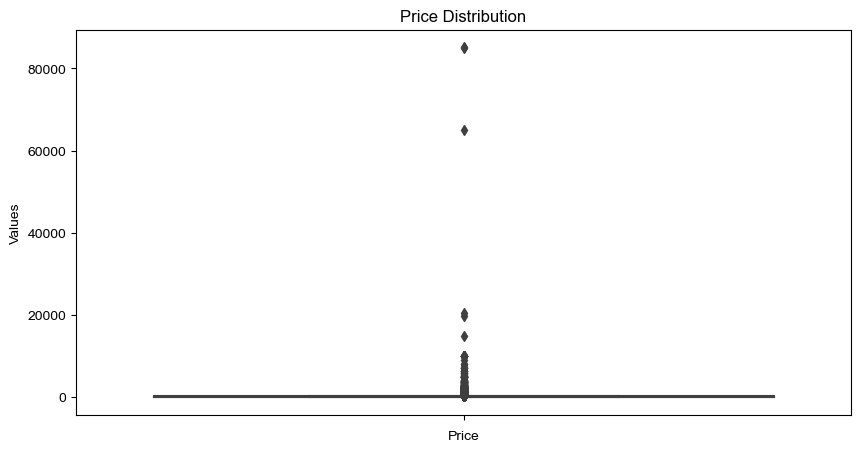

In [43]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=df).set_title('Price Distribution')
sns.set_theme(style='white')
plt.xlabel('Price')
plt.ylabel('Values')
plt.show()

In [44]:
# low quantile
q_low = df['price'].quantile(0.10)
q_low

49.0

In [45]:
# high quantile
q_high = df['price'].quantile(0.90)
q_high

349.0

In [46]:
# removing rows with values below 0.05
df = df.drop(df[df.price < q_low].index)


In [47]:
# removing rows with values above 0.95
df = df.drop(df[df.price > q_high].index)

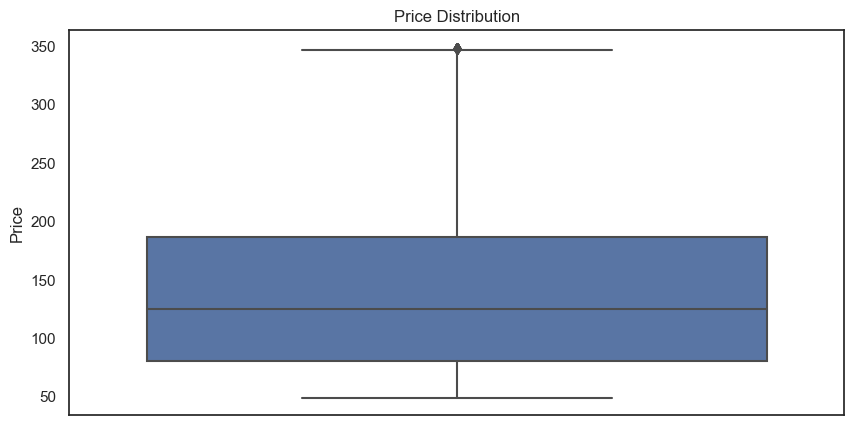

In [48]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=df).set_title('Price Distribution')
sns.set_theme(style='white')
plt.ylabel('Price')
plt.show()

In [49]:
df.head()


,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,0,1.0,1.0,1,40.640403,-73.888535,2,2,2,1.0,1.0,143.0,2,30,2.0,2.0,30.0,30.0,2.0,30.0,30,60,90,364,0,4.641437,4.753062,4.63811,4.816948,4.818122,4.726064,4.650477,NaN
2,0,0,1.0,1.0,4,40.507114,-74.251907,0,6,8,2.0,2.0,157.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,30,60,90,364,0,4.641437,4.753062,4.63811,4.816948,4.818122,4.726064,4.650477,NaN
3,4,1,7.0,7.0,1,40.583490,-73.959880,2,2,8,3.0,1.0,89.0,1,20,1.0,1.0,20.0,20.0,1.0,20.0,30,60,90,364,15,5.000000,5.000000,4.87000,5.000000,5.000000,5.000000,5.000000,5.17
4,4,0,1.0,2.0,0,40.903260,-73.907090,0,3,2,2.0,2.0,125.0,3,21,3.0,3.0,21.0,21.0,3.0,21.0,3,17,46,46,25,4.480000,4.560000,4.44000,4.720000,4.880000,4.720000,4.640000,1.11
5,4,0,3.0,7.0,3,40.763500,-73.826080,2,3,4,1.0,1.0,63.0,2,365,2.0,2.0,1125.0,1125.0,2.0,1125.0,14,44,74,349,40,4.680000,4.880000,4.55000,4.780000,4.780000,4.930000,4.680000,2.26


In [50]:
df.shape

(30824, 34)

In [51]:
df.columns

Index(['host_response_time', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30824 entries, 0 to 42929
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            30824 non-null  int64  
 1   host_is_superhost             30824 non-null  int64  
 2   host_listings_count           30821 non-null  float64
 3   host_total_listings_count     30821 non-null  float64
 4   neighbourhood_group_cleansed  30824 non-null  int64  
 5   latitude                      30824 non-null  float64
 6   longitude                     30824 non-null  float64
 7   room_type                     30824 non-null  int64  
 8   accommodates                  30824 non-null  int64  
 9   bathrooms_text                30824 non-null  int64  
 10  bedrooms                      30824 non-null  float64
 11  beds                          30824 non-null  float64
 12  price                         30824 non-null  float64
 13  m

In [53]:
df.isnull().sum()

host_response_time                 0
host_is_superhost                  0
host_listings_count                3
host_total_listings_count          3
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
room_type                          0
accommodates                       0
bathrooms_text                     0
bedrooms                           0
beds                               0
price                              0
minimum_nights                     0
maximum_nights                     0
minimum_minimum_nights             0
maximum_minimum_nights             0
minimum_maximum_nights             0
maximum_maximum_nights             0
minimum_nights_avg_ntm             0
maximum_nights_avg_ntm             0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
review_scores_rating               0
r

In [54]:
df.drop(['reviews_per_month'], axis=1, inplace=True)

In [55]:

df.drop(['host_listings_count'], axis=1, inplace=True)
df.drop(['host_total_listings_count'], axis=1, inplace=True)

In [56]:
import pandas as pd

# Assuming you have a DataFrame called 'df'
has_nan = df.isnull().any().any()
print(has_nan)

False


In [57]:
df.head()

,host_response_time,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,0,0,1,40.640403,-73.888535,2,2,2,1.0,1.0,143.0,2,30,2.0,2.0,30.0,30.0,2.0,30.0,30,60,90,364,0,4.641437,4.753062,4.63811,4.816948,4.818122,4.726064,4.650477
2,0,0,4,40.507114,-74.251907,0,6,8,2.0,2.0,157.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,30,60,90,364,0,4.641437,4.753062,4.63811,4.816948,4.818122,4.726064,4.650477
3,4,1,1,40.583490,-73.959880,2,2,8,3.0,1.0,89.0,1,20,1.0,1.0,20.0,20.0,1.0,20.0,30,60,90,364,15,5.000000,5.000000,4.87000,5.000000,5.000000,5.000000,5.000000
4,4,0,0,40.903260,-73.907090,0,3,2,2.0,2.0,125.0,3,21,3.0,3.0,21.0,21.0,3.0,21.0,3,17,46,46,25,4.480000,4.560000,4.44000,4.720000,4.880000,4.720000,4.640000
5,4,0,3,40.763500,-73.826080,2,3,4,1.0,1.0,63.0,2,365,2.0,2.0,1125.0,1125.0,2.0,1125.0,14,44,74,349,40,4.680000,4.880000,4.55000,4.780000,4.780000,4.930000,4.680000


In [58]:
df.shape

(30824, 31)

In [59]:
df.corr()["price"].abs().sort_values(ascending=False).keys()

Index(['price', 'room_type', 'accommodates', 'beds', 'bedrooms', 'longitude',
       'minimum_nights_avg_ntm', 'maximum_minimum_nights',
       'host_response_time', 'review_scores_location',
       'review_scores_cleanliness', 'availability_365', 'review_scores_rating',
       'bathrooms_text', 'maximum_maximum_nights', 'availability_30',
       'maximum_nights_avg_ntm', 'minimum_maximum_nights',
       'review_scores_accuracy', 'host_is_superhost',
       'review_scores_communication', 'minimum_nights', 'number_of_reviews',
       'availability_60', 'review_scores_checkin', 'availability_90',
       'neighbourhood_group_cleansed', 'review_scores_value', 'latitude',
       'minimum_minimum_nights', 'maximum_nights'],
      dtype='object')

# 3 Feature Engineering:

In [ ]:
# from sklearn.gaussian_process.kernels import RBF
# def calc_new_f(df, index):
#     landmark = df.iloc[index].values
#     kernel = RBF(100)
#     new_f = []
#     for row_ind in range(len(df)):
#         cur_row = df.iloc[row_ind].values
#         sim = kernel([cur_row], [landmark])[0][0]
#         new_f.append(sim)
#     return new_f

In [ ]:
# df["price"].unique().

array([143., 157.,  89., 125.,  63.,  82., 118.,  49., 115., 179., 172.,
        68., 100., 175.,  60., 301., 109.,  90.,  85.,  99., 216., 280.,
       156., 152., 128.,  55., 225.,  50.,  70., 188.,  56., 101., 215.,
       289., 199., 151., 133., 290., 111., 120., 200.,  51.,  75.,  96.,
        72., 136., 129., 250.,  79.,  80., 180.,  93., 135.,  59., 189.,
       300.,  84., 160., 299.,  88., 150., 155.,  52., 154., 166., 139.,
        69., 134.,  53.,  74., 217.,  66., 164.,  64., 219.,  78.,  62.,
        58., 103., 130., 104., 145.,  57.,  67., 110., 141., 220., 144.,
        91.,  95.,  86.,  83., 119., 209., 342.,  94.,  81., 107., 147.,
        87., 214., 140., 165., 169., 132.,  65., 267., 314.,  54., 233.,
       238., 218., 210., 113.,  61., 294., 108.,  92., 227., 124., 131.,
       116.,  98., 105., 121., 182., 159., 245., 268., 114., 207., 269.,
       102., 310., 168., 228., 205., 196., 230., 206., 340., 183., 283.,
       240., 153., 126., 167., 123., 203., 270.,  7

In [ ]:
# len(df["price"].unique())

301

In [ ]:
# df

,host_response_time,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,new_f
0,0,0,1,40.640403,-73.888535,2,2,2,1.0,1.0,143.0,2,30,2.0,2.0,30.0,30.0,2.0,30.0,30,60,90,364,0,4.641437,4.753062,4.63811,4.816948,4.818122,4.726064,4.650477,1.000000e+00
2,0,0,4,40.507114,-74.251907,0,6,8,2.0,2.0,157.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,30,60,90,364,0,4.641437,4.753062,4.63811,4.816948,4.818122,4.726064,4.650477,1.763840e-10
3,4,1,1,40.583490,-73.959880,2,2,8,3.0,1.0,89.0,1,20,1.0,1.0,20.0,20.0,1.0,20.0,30,60,90,364,15,5.000000,5.000000,4.87000,5.000000,5.000000,5.000000,5.000000,8.351652e-01
4,4,0,0,40.903260,-73.907090,0,3,2,2.0,2.0,125.0,3,21,3.0,3.0,21.0,21.0,3.0,21.0,3,17,46,46,25,4.480000,4.560000,4.44000,4.720000,4.880000,4.720000,4.640000,4.762611e-03
5,4,0,3,40.763500,-73.826080,2,3,4,1.0,1.0,63.0,2,365,2.0,2.0,1125.0,1125.0,2.0,1125.0,14,44,74,349,40,4.680000,4.880000,4.55000,4.780000,4.780000,4.930000,4.680000,1.810292e-81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42923,4,1,2,40.763187,-73.992472,2,1,4,1.0,1.0,68.0,50,120,15.0,50.0,1125.0,1125.0,47.5,1125.0,7,37,63,207,0,4.641437,4.753062,4.63811,4.816948,4.818122,4.726064,4.650477,7.400101e-80
42926,0,0,2,40.726110,-73.988010,2,1,4,1.0,1.0,85.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,0,0,0,0,0,4.641437,4.753062,4.63811,4.816948,4.818122,4.726064,4.650477,3.647672e-108
42927,4,0,2,40.762150,-73.990270,0,6,2,2.0,3.0,208.0,2,1125,1.0,3.0,1125.0,1125.0,2.1,1125.0,3,6,12,23,217,4.480000,4.580000,4.41000,4.650000,4.750000,4.910000,4.510000,1.005795e-108
42928,4,0,2,40.717330,-73.991110,0,3,2,3.0,3.0,125.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,28,57,81,191,7,4.430000,4.430000,3.29000,4.860000,4.860000,5.000000,4.140000,1.334049e-105


In [ ]:
# df = df.reset_index(drop=True)

In [ ]:
# indexes =[]
# for i in range(len(df["price"].unique())):
#     random_rows = df[df["price"] == df["price"].unique()[i]].sample(n=1, random_state=42).index
#     for j in range(len(random_rows)):   
#         indexes.append(random_rows[j])




In [ ]:
# from tqdm import tqdm
# for i in tqdm(indexes):
#     new_f = calc_new_f(df,i)
#     df[f"new_f{i}"] = new_f

In [61]:
# df.to_csv('/Users/zhoramkoyan/Desktop/Project 2nd approach/Prepared data/to_colab_2.csv', index=False)


In [ ]:
# corr_matrix = df.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmax=0.8, square=True)

# # Add plot title
# plt.title('Correlation Matrix')

# # Show the plot
# plt.show()

In [ ]:
# df.corr()["price"].abs().sort_values(ascending=False)[:20]